In [42]:
import sys
sys.path.append('../')
from src.utils import *
from src.estimator import *

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, minmax_scale
from sklearn.model_selection import train_test_split

In [23]:
# df = pd.read_csv('plevel_34_43_23_result_sqrtdnew.csv')
df = pd.read_csv('plevel_34_43_23_result_lastsqrt.csv')

In [24]:
df.columns

Index(['d', 'n', 'lamb', 'pp_train_mean', 'pp_train_std', 'pp_test_mean',
       'pp_test_std', 'jorg_train_mean', 'jorg_train_std', 'jorg_test_mean',
       'jorg_test_std'],
      dtype='object')

In [25]:
df1 = (df["jorg_train_mean"] <= df["pp_train_mean"])
df2 = (df["jorg_train_std"] <= df["pp_train_std"])
df3 = (df["jorg_test_mean"] <= df["pp_test_mean"])
df4 = (df["jorg_test_std"] <= df["pp_test_std"])

print("df1: ", df1.value_counts())
print("df2 : ", df2.value_counts())
print("df3: ", df3.value_counts())
print("df4: ", df4.value_counts())

df1:  False    176
dtype: int64
df2 :  False    176
dtype: int64
df3:  False    176
dtype: int64
df4:  False    176
dtype: int64


In [20]:
d, n, lambs =df['d'].unique(), df['n'].unique(), df['lamb'].unique()
n, d, lambs

(array([ 10,  50, 100, 200]),
 array([10, 20, 30, 40]),
 array([ 0.1,  0.5,  1. ,  3. ,  5. ,  7. ,  9. , 10. , 11. , 13. , 15. ,
         0.2,  2. ,  6. , 14. , 18. , 20. , 22. , 26. , 30. ,  0.3,  1.5,
        21. , 27. , 33. , 39. , 45. ,  0.4,  4. , 12. , 28. , 36. , 40. ,
        44. , 52. , 60. ]))

In [53]:
# d, n, lambs =df['d'].unique(), df['n'].unique(), df['lamb'].unique()
# n, d, lambs, len(n)*len(d)

(array([ 10,  50, 100, 200]),
 array([10, 20, 30, 40]),
 array([0.01, 0.05, 0.1 , 0.3 , 0.5 , 0.7 , 0.9 , 1.  , 1.1 , 1.3 , 1.5 ]),
 16)

In [28]:
df_poor_generalization = df[df['pp_test_mean'] >= 1][['n','d','lamb', 'pp_test_mean','jorg_test_mean']]
df_poor_generalization.sort_values(by=['pp_test_mean'], ascending=True)
df_poor_generalization

,n,d,lamb,pp_test_mean,jorg_test_mean
0,10,10,0.1,997.284357,1227.802650
1,10,10,0.5,97.980405,122.082100
2,10,10,1.0,37.361449,46.271778
3,10,10,3.0,8.508283,10.502711
4,10,10,5.0,4.367016,5.369139
...,...,...,...,...,...
156,100,40,4.0,7.743301,8.926919
157,100,40,12.0,1.730290,2.009481
165,200,40,0.4,101.907949,116.783169
166,200,40,2.0,10.048276,11.687731


In [30]:
df_poor_generalization.describe()

,n,d,lamb,pp_test_mean,jorg_test_mean
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,58.681319,25.494505,10.153846,101.021300,123.361858
std,64.208147,11.181705,13.407728,306.205313,379.389996
min,10.000000,10.000000,0.100000,1.016637,1.241798
25%,10.000000,20.000000,1.000000,2.554185,3.123761
50%,50.000000,30.000000,3.000000,6.851336,8.409845
75%,100.000000,40.000000,14.500000,44.713838,52.286956
max,200.000000,40.000000,60.000000,1808.997553,2260.876973


In [27]:
df_good_generalization = df[df['pp_test_mean'] < 1][['n','d','lamb', 'pp_test_mean','jorg_test_mean']]
df_good_generalization.sort_values(by=['pp_test_mean'], ascending=True)
df_good_generalization

,n,d,lamb,pp_test_mean,jorg_test_mean
15,50,10,5.0,0.874519,1.024707
16,50,10,7.0,0.574642,0.668768
17,50,10,9.0,0.425271,0.495028
18,50,10,10.0,0.375018,0.437510
19,50,10,11.0,0.325831,0.383477
...,...,...,...,...,...
171,200,40,36.0,0.216584,0.250591
172,200,40,40.0,0.192189,0.221195
173,200,40,44.0,0.169382,0.194741
174,200,40,52.0,0.136932,0.155379


In [69]:
((df['jorg_test_mean'] >= 1) | (df['pp_test_mean'] >= 1)).sum()

140

In [68]:
(df['jorg_test_mean'] >= 1).sum(), (df['pp_test_mean'] >= 1).sum()

(140, 131)

In [56]:
Counter(df[df['pp_test_mean'] >= 1]['lamb'])

Counter({0.01: 16,
         0.05: 16,
         0.1: 16,
         0.3: 16,
         0.5: 14,
         0.7: 11,
         0.9: 10,
         1.0: 9,
         1.1: 9,
         1.3: 7,
         1.5: 7})

In [108]:
fracs, lambs = df['frac_train'].unique(), df['lamb'].unique()

In [109]:
fracs, lambs

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0.01, 0.05, 0.1 , 0.3 , 0.5 , 0.7 , 0.9 , 1.  , 1.1 , 1.3 , 1.5 ]))

In [18]:
df.shape

(110, 10)

In [96]:
df[df['frac_train'] == 0.1]['jorg_test_mean'], df[df['frac_train'] == 0.1]['pp_test_mean']

df[df['frac_train'] == 1.0]['jorg_test_mean'], df[df['frac_train'] == 1.0]['pp_test_mean']

(99     224496.952230
 100      1884.837766
 101       252.787688
 102        10.424590
 103         2.486158
 104         0.983013
 105         0.515536
 106         0.392844
 107         0.312560
 108         0.213891
 109         0.157115
 Name: jorg_test_mean, dtype: float64,
 99     141324.475839
 100      1228.640519
 101       161.320140
 102         6.636587
 103         1.583218
 104         0.636249
 105         0.337898
 106         0.261590
 107         0.210632
 108         0.151100
 109         0.115731
 Name: pp_test_mean, dtype: float64)

In [35]:
dfd[dfd['n'] == n_tr]['lamb']

110     0.3
111     1.5
112     3.0
113     9.0
114    15.0
115    21.0
116    27.0
117    30.0
118    33.0
119    39.0
120    45.0
Name: lamb, dtype: float64

In [69]:
lamb_arr = [10**5, 10**6, 10**7]

In [70]:
N = 100
d = 30
runs = 10000
X, y = generate_linear_data(n = N, d = d, sigma = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
N_train, N_test = len(X_train), len(X_test)
epsilons = epsilons_34_43_23(N_train)
list_of_results = []
i = 0
for lamb in lamb_arr:
    lamb = lamb
    pp_unw_train_mean, pp_unw_train_std, pp_w_test_mean, pp_w_test_std = pp_estimator(epsilons, X_train, y_train, X_test, y_test, lamb, runs)
    jorg_unw_train_mean, jorg_unw_train_std, jorg_w_test_mean, jorg_w_test_std = jorgensen_private_estimator(epsilons, X_train, y_train, X_test, y_test, lamb, runs)    
    di = {"d": d,
        "n": n,
        "lamb": lamb,
        "pp_train_mean": pp_unw_train_mean,
        "pp_train_std": pp_unw_train_std,
        "pp_test_mean": pp_w_test_mean,
        "pp_test_std": pp_w_test_std,
        "jorg_train_mean": jorg_unw_train_mean,
        "jorg_train_std": jorg_unw_train_std,
        "jorg_test_mean": jorg_w_test_mean,
        "jorg_test_std": jorg_w_test_std}
    i += 1
    print(f"Expt {i} done, lambda {lamb}")
    list_of_results.append(di)
df = pd.DataFrame(list_of_results)

Expt 1 done, lambda 100000
Expt 2 done, lambda 1000000
Expt 3 done, lambda 10000000


In [51]:
df.columns

Index(['d', 'n', 'lamb', 'pp_train_mean', 'pp_train_std', 'pp_test_mean',
       'pp_test_std', 'jorg_train_mean', 'jorg_train_std', 'jorg_test_mean',
       'jorg_test_std'],
      dtype='object')

In [68]:
((np.sum(y**2))**0.5)/100

0.005401626795681264

Text(0, 0.5, 'rmse')

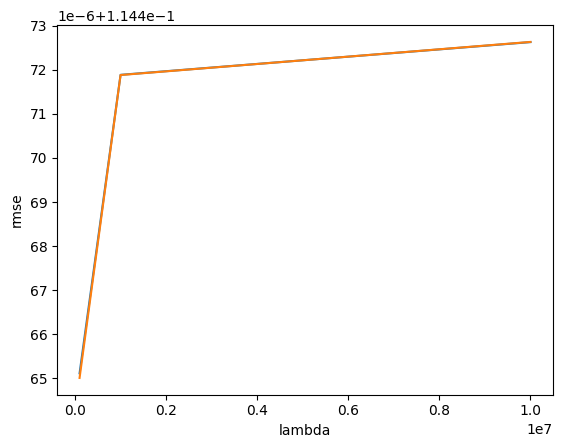

In [71]:
si = 0 # starting index  
pp_test = df['pp_test_mean'][si:]
jorg_test = df['jorg_test_mean'][si:]

plt.plot(lamb_arr[si:], pp_test)
plt.plot(lamb_arr[si:], jorg_test)

plt.xlabel('lambda')
plt.ylabel('rmse')

Text(0, 0.5, 'rmse')

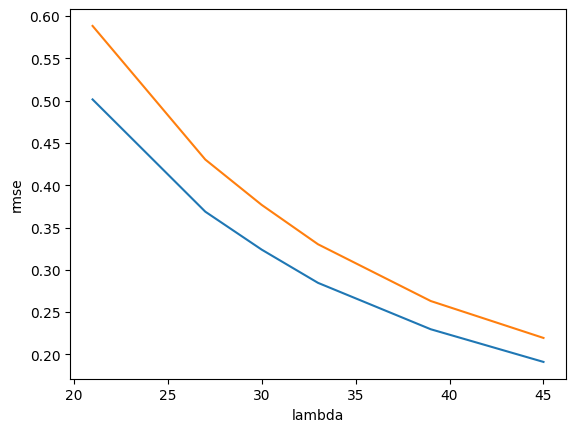

In [34]:
si = 5
n_tr = 100
d = 30

dfd = df[df['d'] == d]
plt.plot(dfd[dfd['n'] == n_tr]['lamb'][si:], dfd[dfd['n'] == n_tr]['pp_test_mean'][si:])
plt.plot(dfd[dfd['n'] == n_tr]['lamb'][si:], dfd[dfd['n'] == n_tr]['jorg_test_mean'][si:])
plt.xlabel('lambda')
plt.ylabel('rmse')

In [14]:
1/30**0.5

0.18257418583505536

In [19]:
for frac in fracs:
  df_frac = df[df['frac_train'] == frac]
  res_frac = []
  for lamb in lambs:
    print(len(df_frac[df_frac['lamb'] == lamb]))

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11


In [5]:
df[df["jorg_train_mean"] <= df["pp_train_mean"]]

,frac_train,lamb,pp_train_mean,pp_train_std,pp_test_mean,pp_test_std,jorg_train_mean,jorg_train_std,jorg_test_mean,jorg_test_std


In [6]:
df[df["jorg_test_mean"] <= df["pp_test_mean"]]

,frac_train,lamb,pp_train_mean,pp_train_std,pp_test_mean,pp_test_std,jorg_train_mean,jorg_train_std,jorg_test_mean,jorg_test_std


In [7]:
(df["pp_test_mean"]>=1.0).value_counts() # wherever mean error > 1 

False    82
True     28
Name: pp_test_mean, dtype: int64

In [8]:
df[df["pp_test_mean"]>=1.0]['lamb'].value_counts()

0.01    10
0.05    10
0.10     7
0.30     1
Name: lamb, dtype: int64

In [118]:
df['jorg_minus_pp_test'] = df["jorg_test_mean"] - df["pp_test_mean"]# difference between jorgensen and ours on test

In [101]:
df['jorg_minus_pp_test'].describe()

count    1.100000e+02
mean     1.253646e+05
std      8.958567e+05
min      4.138458e-02
25%      3.836532e-01
50%      3.001106e+00
75%      1.844665e+02
max      9.137212e+06
Name: jorg_minus_pp_test, dtype: float64

In [119]:
df['%_from_jorg_test'] = 100 * df['jorg_minus_pp_test'] / df["jorg_test_mean"]

In [103]:
df['%_from_jorg_test'].describe() # with 54

count    110.000000
mean      35.813674
std        2.351464
min       26.340272
25%       35.179644
50%       36.341033
75%       37.147212
max       40.138966
Name: %_from_jorg_test, dtype: float64

In [120]:
df['%_from_jorg_test'].describe() # with 34

count    110.000000
mean      24.377524
std        2.754119
min       14.343887
25%       23.884898
50%       25.027060
75%       26.179536
max       27.993348
Name: %_from_jorg_test, dtype: float64

In [75]:
from src.utils import generate_linear_data

In [83]:
X,y = generate_linear_data(100, 100, 0)

In [82]:
np.linalg.norm(X, axis=1)

array([0.73706959, 0.69739452, 0.4186397 , 1.19505064])

In [86]:
max(np.linalg.norm(X, axis=1))

6.491934149576997

In [81]:
3**0.5

1.7320508075688772

In [87]:
1/4*100

25.0